# 深層学習前編（day2）: 実装演習

本書は、「深層学習前編（day2）レポート」の、実装演習についてのものです。


### 2_1_network_modified.ipynb


#### キャプチャ

自身の環境において、最終コードセル[5]までの実行を確認した。


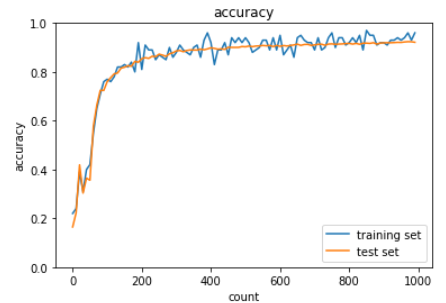

#### 内容

実装演習の際、確認した内容を記録する。


同じ MNIST dataset に対する結果として、
(day1) の、 `1_4_1_mnist_sample.ipynb` と同じ結果を得た。



- NOTE: 用語: `Affine` (全結合層)<br>
> Adjective<br>
MATHEMATICS<br>
allowing for or preserving parallel relationships.

- [アフィン変換の意味と４つの基本要素 - 具体例で学ぶ数学](https://mathwords.net/affine)<br>
  > アフィン変換は、一次変換に平行移動を加えたものです。

$$
\textbf{y} = \textbf{a} \textbf{x} + \textbf{b}
$$

のこと。


### 2_2_2_vanishing_gradient_modified.ipynb


#### キャプチャ

自身の環境において、最終コードセル[7]までの実行を確認した。


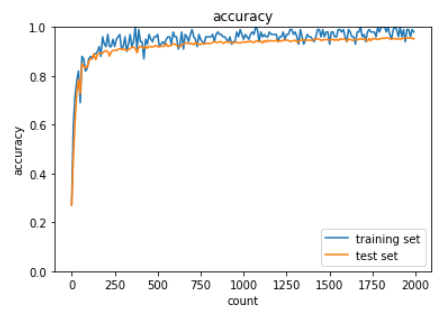

#### 内容

実装演習の際、確認した内容を記録する。


"sigmoid - gauss" については、勾配消失問題によって学習が進んでいなかった。


"sigmoid - gauss" で `hidden_size_list` を倍にしてみたが、結果に影響はなかった。

```python
# network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01)
# [try] hidden_size_listの数字を変更してみよう
network = MultiLayerNet(input_size=784, hidden_size_list=[80, 40], output_size=10, activation='sigmoid', weight_init_std=0.01)
```

- NOTE: 隠れ層の適切なサイズの設定方法とは?


"[try] sigmoid - He" を試行した。

```python
network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std='he')
```


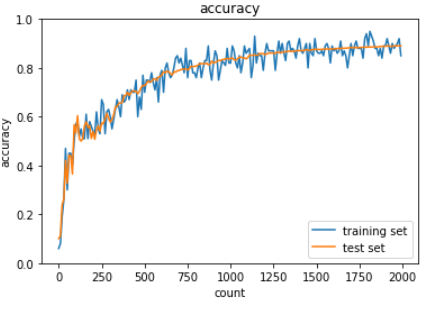

以下の "sigmoid - Xavier" に比べて初期の学習効率が向上した。


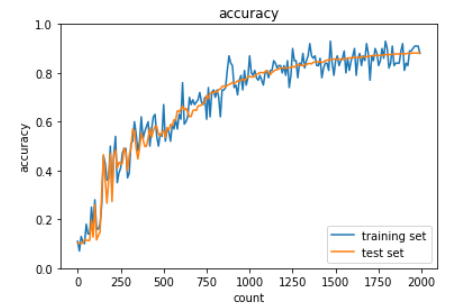

"[try] ReLU - Xavier" を試行した。 "ReLU- He" とほぼ同等の結果を得た。

```python
network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std='Xavier')
```

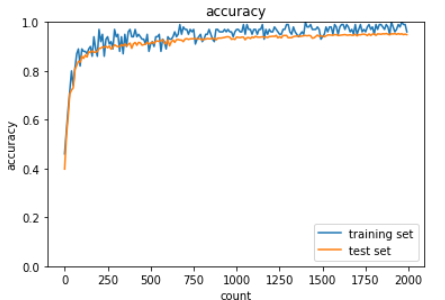

### 2_3_batch_normalization.ipynb


#### キャプチャ

自身の環境において、最終コードセル[4]までの実行を確認した。


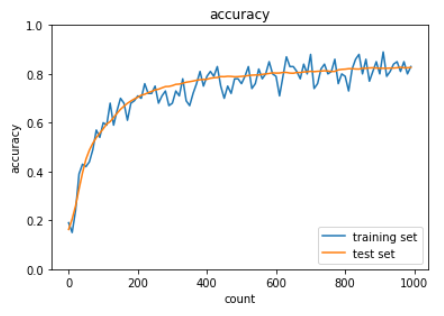

#### 内容

実装演習の際、確認した内容を記録する。


"[try] 活性化関数や重みの初期値を変えてみよう" を試行。

| 活性化関数 | 重みの初期値 | 備考 |
| - | - | - |
| sigmoid | Xavier | 初期値 |
| relu | he | |

ReLU - He により、初期の学習効率が微増した。


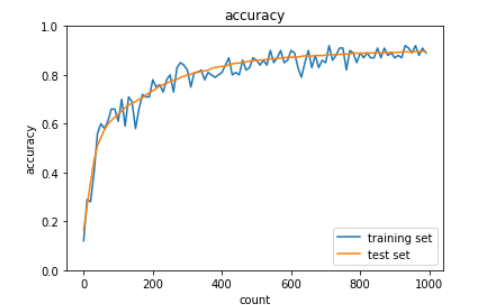

バッチ正規化をしていない場合と比較した。

```python
network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10,
                        activation='sigmoid', weight_init_std='Xavier', use_batchnorm=use_batchnorm)
```

の、 `use_batchnorm = False` にして実行。<br>
このデータの場合、バッチ正規化をしないと学習が進まないものであった。
バッチ正規化の効果を確認した。


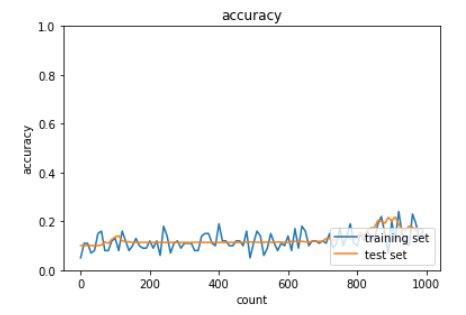

### 2_4_optimizer.ipynb


#### キャプチャ

自身の環境において、最終コードセル[7]までの実行を確認した。


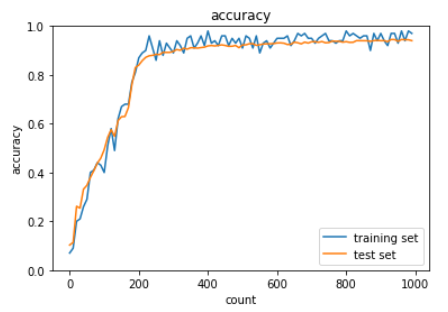

#### 内容

実装演習の際、確認した内容を記録する。


"MomentumをもとにAdaGradを作ってみよう" を試行。

```python
# AdaGradでは不必要
# =============================

# momentum = 0.9
theta = 1e-4
```


$$
h_0 = \theta
$$

に対応して、

```python
        if i == 0:
            h[key] = np.full_like(network.params[key], theta)
```


$$
h_t = h_{t-1} + ( \nabla E )^2
$$

は、先のコードの初期化部分に続いて、

```python
        else:
            h[key] += np.square(grad[key])
```


$$
\textbf{w}^{(t+1)}
=
\textbf{w}^{(t)}
-
\epsilon \frac{1}
{ \sqrt{h_t} + \theta }
\nabla E
$$

は、

```python
        learning_rate_t = learning_rate * (1/(np.sqrt(h[key]) + theta))
        network.params[key] += h[key] - learning_rate_t * grad[key]
```


しかし、 Momentum 同様、学習が進まなかった。


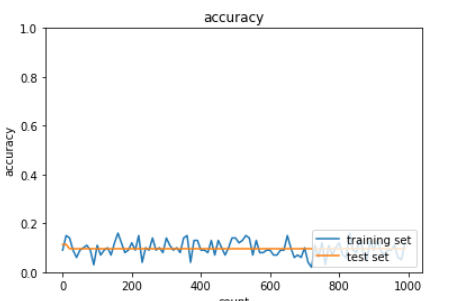

`2_4_optimizer_after.ipynb` を参考。
`2_4_optimizer_after.ipynb` 同様、学習率を以下にすると、学習が進んだ。

```python
# learning_rate = 0.01
learning_rate = 0.1
```


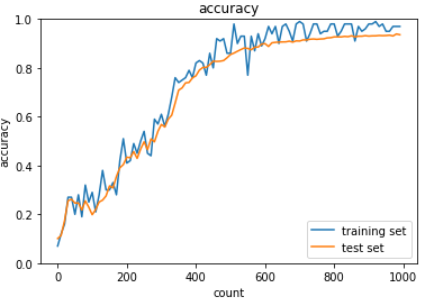

### 2_5_overfiting.ipynb


#### キャプチャ

自身の環境において、最終コードセル[7]までの実行を確認した。


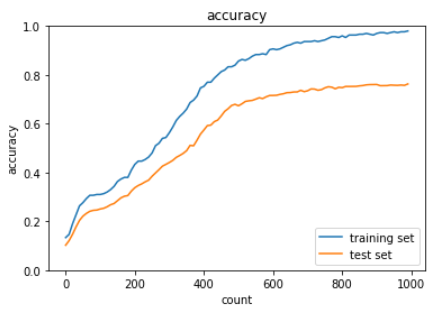

#### 内容

実装演習の際、確認した内容を記録する。


"[try] weigth_decay_lambdaの値を変更して正則化の強さを確認しよう" を試行。<br>
2 倍にした。

| 正規化 | weight_decay_lambda | 備考 |
| - | - | - |
| L2 | 0.1 | 初期値 |
| L1 | 0.005 | 初期値 |
| L2 | 0.2 | 初期値 |
| L1 | 0.01 | 初期値 |

結果、悪化。正則化が強すぎると学習に悪影響を及ぼす。


##### L2 / 0.1


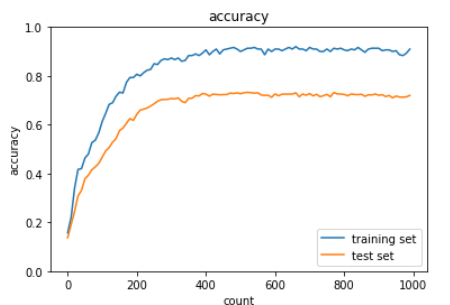

##### L1 / 0.0005


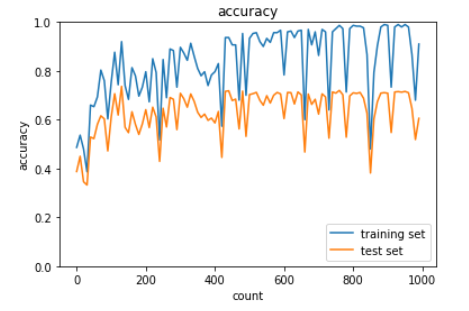

##### L2 / 0.2


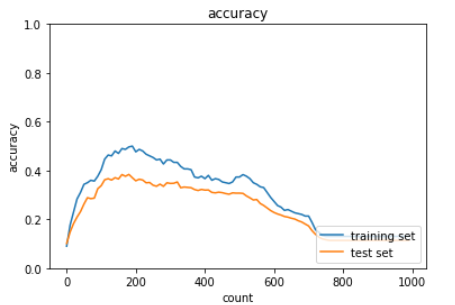

##### L1 / 0.001


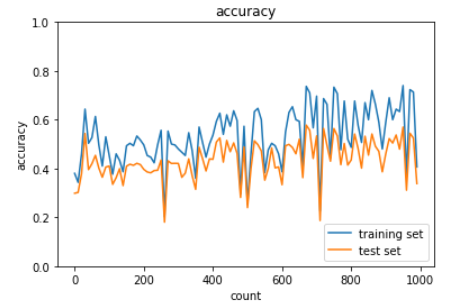

"[try] dropout_ratioの値を変更してみよう" を試行。

`2_8_deep_convolution_net.ipynb` を参考に、 0.5 とした。<br>
( "Dropout + L1"  のコードを使用 )

```python
# dropout_ratio = 0.08
dropout_ratio = 0.5
```


##### dropout_ratio = 0.08


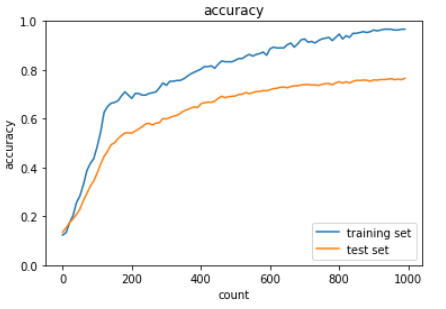

##### dropout_ratio = 0.5


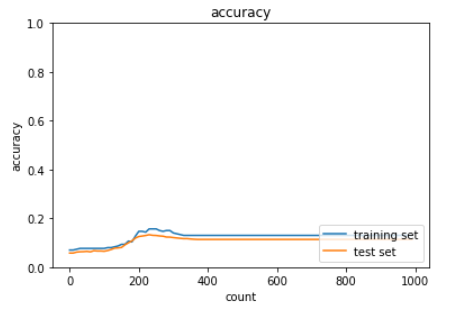

##### dropout_ratio = 0.5

初期値の 2 倍 `dropout_ratio = 0.16` でも、悪化し、ドロップアウトにも適切な値の設定が必要。


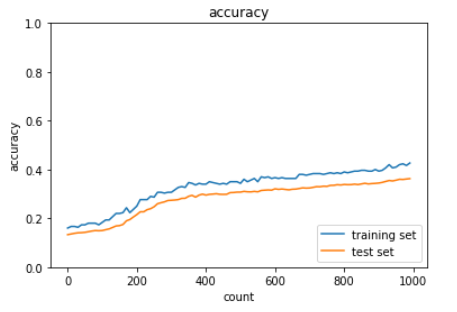

##### dropout_ratio = 0.16 / L2

`dropout_ratio = 0.16` で、

```python
        # weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))
```
としたが、初期の学習効率は上昇したが、全体的には変わらないものになった。


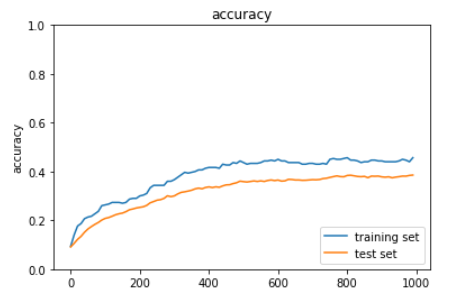

### 2_6_simple_convolution_network.ipynb


#### キャプチャ

自身の環境において、最終コードセル[9]までの実行を確認した。


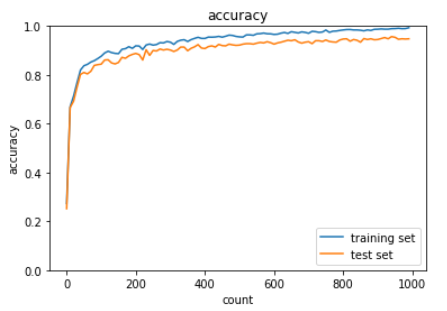

#### 内容

実装演習の際、確認した内容を記録する。


"・関数内でtransposeの処理をしている行をコメントアウトして下のコードを実行してみよう" を試行。

変更前は、

```
========== input_data ===========
 [[[[84. 22.  6.  5.]
   [51.  6. 90. 56.]
   [93. 85. 90.  3.]
   [39. 11. 21. 99.]]]


 [[[31.  3. 71. 61.]
   [47. 85. 19. 24.]
   [63.  1. 53. 64.]
   [ 9. 49. 37. 16.]]]]
==============================
============= col ==============
 [[84. 22.  6. 51.  6. 90. 93. 85. 90.]
 [22.  6.  5.  6. 90. 56. 85. 90.  3.]
 [51.  6. 90. 93. 85. 90. 39. 11. 21.]
 [ 6. 90. 56. 85. 90.  3. 11. 21. 99.]
 [31.  3. 71. 47. 85. 19. 63.  1. 53.]
 [ 3. 71. 61. 85. 19. 24.  1. 53. 64.]
 [47. 85. 19. 63.  1. 53.  9. 49. 37.]
 [85. 19. 24.  1. 53. 64. 49. 37. 16.]]
==============================
```

変更すると、

```
========== input_data ===========
 [[[[28.  9.  1. 18.]
   [37. 96. 69. 34.]
   [85. 20. 85. 33.]
   [98. 87. 11. 58.]]]


 [[[44. 43. 17. 31.]
   [50. 37. 35. 54.]
   [83. 77. 97. 14.]
   [ 5. 68. 35. 38.]]]]
==============================
============= col ==============
 [[28.  9. 37. 96.  9.  1. 96. 69.  1.]
 [18. 69. 34. 37. 96. 85. 20. 96. 69.]
 [20. 85. 69. 34. 85. 33. 85. 20. 98.]
 [87. 20. 85. 87. 11. 85. 33. 11. 58.]
 [44. 43. 50. 37. 43. 17. 37. 35. 17.]
 [31. 35. 54. 50. 37. 83. 77. 37. 35.]
 [77. 97. 35. 54. 97. 14. 83. 77.  5.]
 [68. 77. 97. 68. 35. 97. 14. 35. 38.]]
==============================
```

フィルターがストライドして範囲となる要素成分を並べたものであった。

この形式に変換したものを、 `col2im` で元のイメージの行列に戻す。


### 2_7_double_comvolution_network.ipynb


#### キャプチャ

自身の環境において、最終コードセル[4]までの実行を確認した。


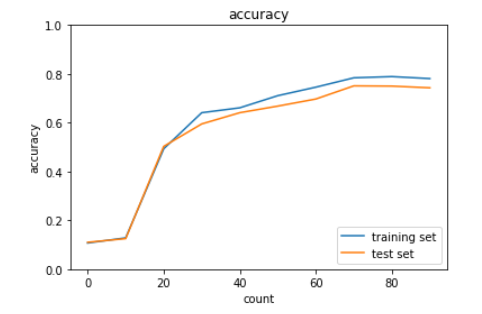

#### 内容

実装演習の際、確認した内容を記録する。


`2_6_simple_convolution_network` に対して、
Conv2, Pool2 のレイヤーが追加されている。


> pooling層を一つ減らしたものに変えてみよう<br>
> conv - relu - conv - relu - pool - affine - relu - affine - softmax

Pool1 のレイヤーをコメントアウトした。

```pythoh
        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Conv1'] = layers.Convolution(self.params['W1'], self.params['b1'], conv_param_1['stride'], conv_param_1['pad'])
        self.layers['Relu1'] = layers.Relu()
        # self.layers['Pool1'] = layers.Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Conv2'] = layers.Convolution(self.params['W2'], self.params['b2'], conv_param_2['stride'], conv_param_2['pad'])
        self.layers['Relu2'] = layers.Relu()
        self.layers['Pool2'] = layers.Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = layers.Affine(self.params['W3'], self.params['b3'])
        self.layers['Relu3'] = layers.Relu()
        self.layers['Affine2'] = layers.Affine(self.params['W4'], self.params['b4'])
```

shape の調整が必要であったため、 `2_7_double_comvolution_network_after.py` を参考に、

```python
        # conv_output_size_2 = (conv_output_size_1 / 2 - conv_param_2['filter_size'] + 2 * conv_param_2['pad']) / conv_param_2['stride'] + 1
        conv_output_size_2 = (conv_output_size_1 - conv_param_2['filter_size'] + 2 * conv_param_2['pad']) / conv_param_2['stride'] + 1
```



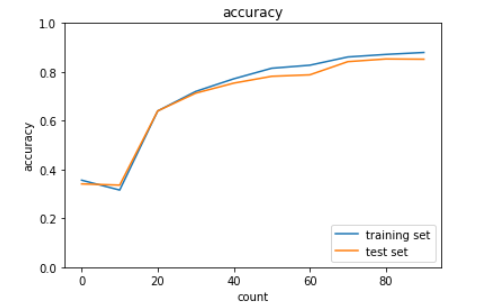

一時的に停滞するも、初期の学習効率が若干上昇した。


### 2_8_deep_convolution_net.ipynb


#### キャプチャ

自身の環境において、最終コードセル[4]までの実行を確認した。


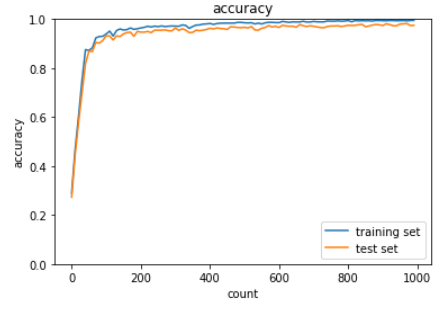

#### 内容

実装演習の際、確認した内容を記録する。


最終コードセル[4] は、 Google Colab の TPU runtime でも 1 時間掛かるものだった。
